In [2]:
"""
Results Analysis Notebook

Interactive exploration of experiment results.
Use this to view plots inline, then run the .py script to save final versions.
"""

# Setup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path

# Set style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11

print("Setup complete!")

Setup complete!


In [10]:
# Load the combined results CSV
results_path = '../results/resnet34/all_experiments_summary.csv'
df = pd.read_csv(results_path, index_col=0)

print("Loaded results:")
print(df)

# ALTERNATIVE: Extract layer using split instead of regex
# resnet34_layer1_attention → split by '_' → get 'layer1'
df['layer'] = df.index.str.split('_').str[1]

print("\nExtracted layers:", df['layer'].tolist())

# Verify extraction worked
if df['layer'].isna().any():
    print("\nWARNING: Some layers failed to extract!")
    print("Trying manual extraction...")
    
    # Manual fallback
    layer_map = {}
    for idx in df.index:
        if 'layer1' in idx:
            layer_map[idx] = 'layer1'
        elif 'layer2' in idx:
            layer_map[idx] = 'layer2'
        elif 'layer3' in idx:
            layer_map[idx] = 'layer3'
        elif 'layer4' in idx:
            layer_map[idx] = 'layer4'
    
    df['layer'] = df.index.map(layer_map)
    print("Manual extraction:", df['layer'].tolist())
else:
    print("\n✅ Layer extraction successful!")

print("\nDataFrame with layers:")
print(df[['layer', 'psnr_mean', 'ssim_mean', 'lpips_mean', 'training_time_minutes']])

Loaded results:
                           psnr_mean  psnr_std  ssim_mean  ssim_std  \
resnet34_layer1_attention  14.291336  0.730197   0.468047  0.042786   
resnet34_layer2_attention  14.058378  0.692129   0.386127  0.043853   
resnet34_layer3_attention  13.579797  0.632251   0.294431  0.047683   
resnet34_layer4_attention  13.026686  0.573187   0.271183  0.047173   

                           lpips_mean  lpips_std  mse_mean   mse_std  \
resnet34_layer1_attention    0.451717   0.034143  0.042200  0.006745   
resnet34_layer2_attention    0.555550   0.031339  0.043960  0.006727   
resnet34_layer3_attention    0.736274   0.029990  0.048108  0.006863   
resnet34_layer4_attention    0.870115   0.027009  0.053782  0.007023   

                           training_time_minutes  
resnet34_layer1_attention              94.920976  
resnet34_layer2_attention              35.802481  
resnet34_layer3_attention              36.139318  
resnet34_layer4_attention              36.113262  

Extracted l

In [8]:
# DEBUG: Check what's in the CSV and DataFrame

print("="*60)
print("DEBUG: Checking data structure")
print("="*60)

print("\n1. CSV file path:")
print(f"   {results_path}")
print(f"   Exists: {Path(results_path).exists()}")

print("\n2. DataFrame shape:")
print(f"   {df.shape} (rows, columns)")

print("\n3. DataFrame index (experiment names):")
for idx in df.index:
    print(f"   - {idx}")

print("\n4. DataFrame columns:")
print(f"   {df.columns.tolist()}")

print("\n5. Layer extraction:")
print(f"   df['layer'] = {df['layer'].tolist()}")
print(f"   Any NaN? {df['layer'].isna().any()}")

print("\n6. Sample row:")
print(df.iloc[0])

print("\n7. Full DataFrame:")
print(df)

print("\n" + "="*60)

DEBUG: Checking data structure

1. CSV file path:
   ../results/resnet34/all_experiments_summary.csv
   Exists: True

2. DataFrame shape:
   (4, 12) (rows, columns)

3. DataFrame index (experiment names):
   - resnet34_layer1_attention
   - resnet34_layer2_attention
   - resnet34_layer3_attention
   - resnet34_layer4_attention

4. DataFrame columns:
   ['psnr_mean', 'psnr_std', 'ssim_mean', 'ssim_std', 'lpips_mean', 'lpips_std', 'mse_mean', 'mse_std', 'training_time_minutes', 'layer', 'params', 'params_millions']

5. Layer extraction:
   df['layer'] = [nan, nan, nan, nan]
   Any NaN? True

6. Sample row:
psnr_mean                14.291336
psnr_std                  0.730197
ssim_mean                 0.468047
ssim_std                  0.042786
lpips_mean                0.451717
lpips_std                 0.034143
mse_mean                    0.0422
mse_std                   0.006745
training_time_minutes    94.920976
layer                          NaN
params                         NaN
par

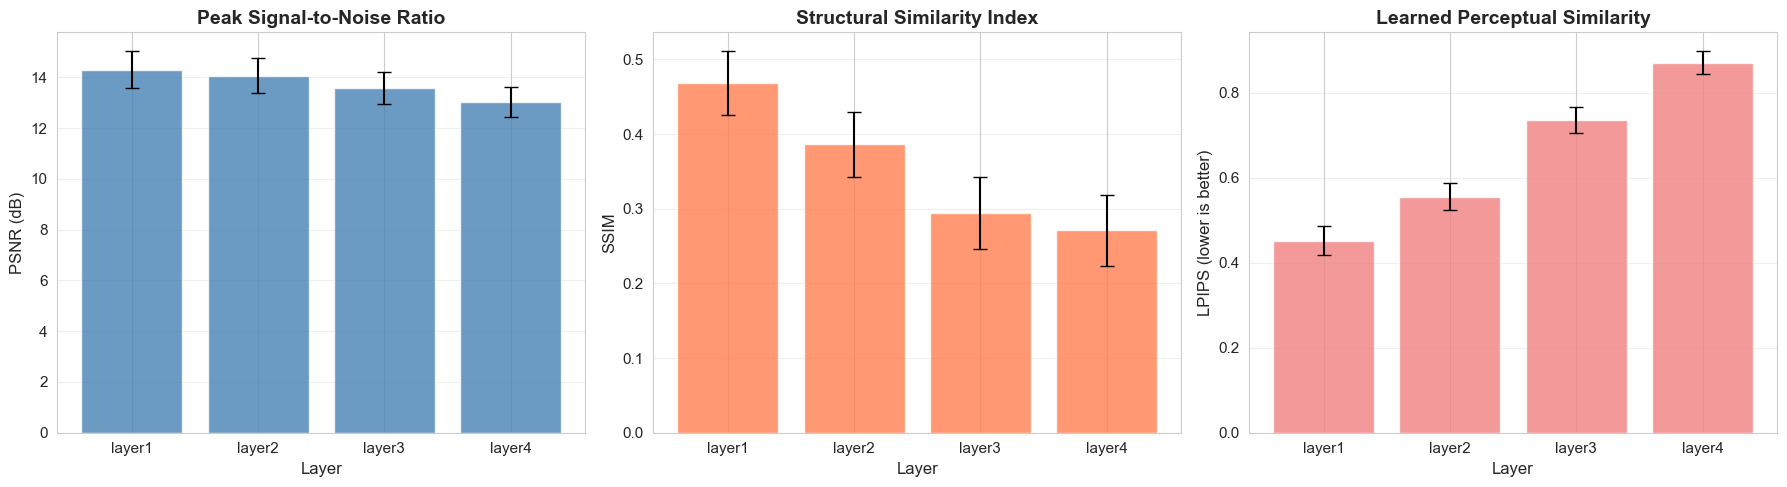


Key Finding: Layer1 achieves best quality across all metrics!


In [11]:
# Plot 1 Quality Metrics Comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# PSNR
axes[0].bar(df['layer'], df['psnr_mean'], color='steelblue', alpha=0.8)
axes[0].errorbar(df['layer'], df['psnr_mean'], yerr=df['psnr_std'], 
                 fmt='none', ecolor='black', capsize=5)
axes[0].set_xlabel('Layer', fontsize=12)
axes[0].set_ylabel('PSNR (dB)', fontsize=12)
axes[0].set_title('Peak Signal-to-Noise Ratio', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='y')

# SSIM
axes[1].bar(df['layer'], df['ssim_mean'], color='coral', alpha=0.8)
axes[1].errorbar(df['layer'], df['ssim_mean'], yerr=df['ssim_std'], 
                 fmt='none', ecolor='black', capsize=5)
axes[1].set_xlabel('Layer', fontsize=12)
axes[1].set_ylabel('SSIM', fontsize=12)
axes[1].set_title('Structural Similarity Index', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y')

# LPIPS (lower is better, so invert colors)
axes[2].bar(df['layer'], df['lpips_mean'], color='lightcoral', alpha=0.8)
axes[2].errorbar(df['layer'], df['lpips_mean'], yerr=df['lpips_std'], 
                 fmt='none', ecolor='black', capsize=5)
axes[2].set_xlabel('Layer', fontsize=12)
axes[2].set_ylabel('LPIPS (lower is better)', fontsize=12)
axes[2].set_title('Learned Perceptual Similarity', fontsize=14, fontweight='bold')
axes[2].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\nKey Finding: Layer1 achieves best quality across all metrics!")

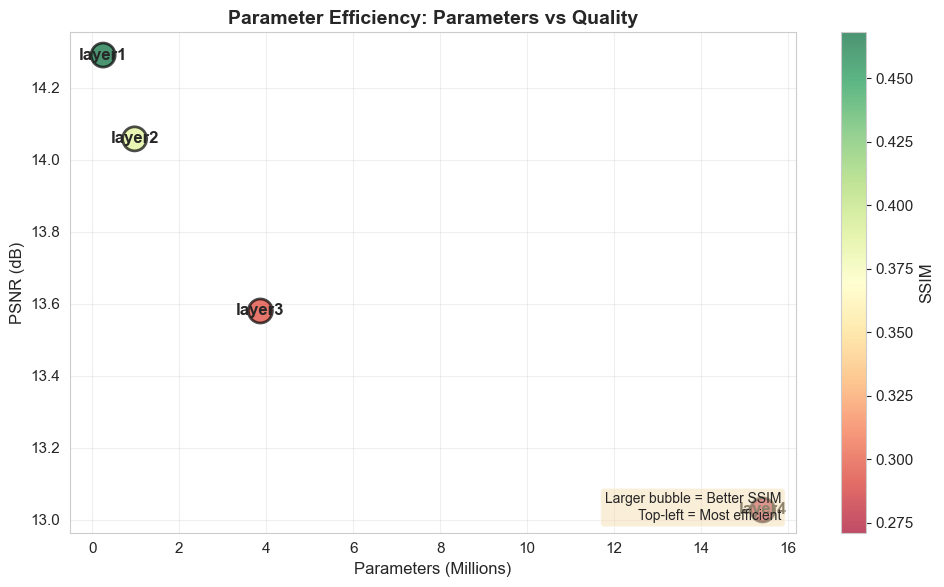


Efficiency Analysis:
  Layer1: 250,147 params → 14.29 dB
  Layer4: 15,413,603 params → 13.03 dB
  Layer4 has 61x more parameters but WORSE quality!


In [12]:

# Plot 2 - Efficiency Analysis (Parameters vs Quality)
# Load model info to get parameter counts
params = {
    'layer1': 250_147,
    'layer2': 974_563,
    'layer3': 3_865_187,
    'layer4': 15_413_603
}

df['params'] = df['layer'].map(params)
df['params_millions'] = df['params'] / 1_000_000

fig, ax = plt.subplots(figsize=(10, 6))

# Scatter plot with layer labels
scatter = ax.scatter(df['params_millions'], df['psnr_mean'], 
                     s=300, c=df['ssim_mean'], cmap='RdYlGn', 
                     alpha=0.7, edgecolors='black', linewidth=2)

# Add layer labels
for idx, row in df.iterrows():
    ax.annotate(row['layer'], 
                (row['params_millions'], row['psnr_mean']),
                fontsize=12, fontweight='bold',
                ha='center', va='center')

# Add colorbar for SSIM
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('SSIM', fontsize=12)

ax.set_xlabel('Parameters (Millions)', fontsize=12)
ax.set_ylabel('PSNR (dB)', fontsize=12)
ax.set_title('Parameter Efficiency: Parameters vs Quality', 
             fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)

# Add annotation
ax.text(0.98, 0.02, 'Larger bubble = Better SSIM\nTop-left = Most efficient', 
        transform=ax.transAxes, fontsize=10,
        verticalalignment='bottom', horizontalalignment='right',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

print(f"\nEfficiency Analysis:")
print(f"  Layer1: {params['layer1']:,} params → {df.loc[df['layer']=='layer1', 'psnr_mean'].values[0]:.2f} dB")
print(f"  Layer4: {params['layer4']:,} params → {df.loc[df['layer']=='layer4', 'psnr_mean'].values[0]:.2f} dB")
print(f"  Layer4 has 61x more parameters but WORSE quality!")

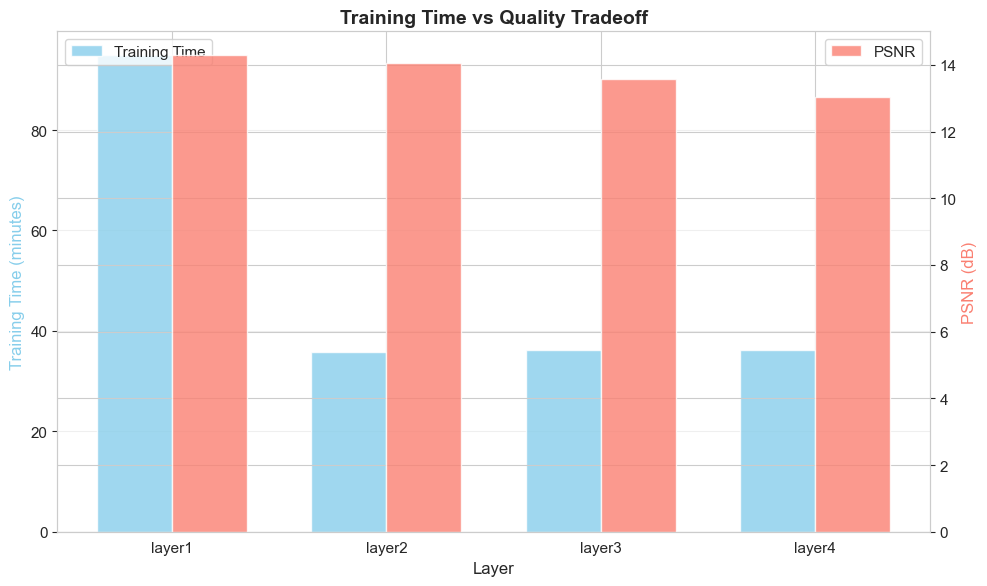


Time-Quality Tradeoff:
  Layer1: 94.9 min → 14.29 dB (slowest, best quality)
  Layers 2-4: ~36 min → declining quality


In [13]:
# Plot 3  - Training Time Analysis
fig, ax = plt.subplots(figsize=(10, 6))

# Create bar plot with two y-axes
x = np.arange(len(df))
width = 0.35

ax.bar(x - width/2, df['training_time_minutes'], width, 
       label='Training Time', color='skyblue', alpha=0.8)

ax2 = ax.twinx()
ax2.bar(x + width/2, df['psnr_mean'], width, 
        label='PSNR', color='salmon', alpha=0.8)

ax.set_xlabel('Layer', fontsize=12)
ax.set_ylabel('Training Time (minutes)', fontsize=12, color='skyblue')
ax2.set_ylabel('PSNR (dB)', fontsize=12, color='salmon')
ax.set_title('Training Time vs Quality Tradeoff', fontsize=14, fontweight='bold')

# FIXED: Use df['layer'] values for x-tick labels
ax.set_xticks(x)
ax.set_xticklabels(df['layer'].values)  # Changed from df['layer'] to df['layer'].values

ax.legend(loc='upper left')
ax2.legend(loc='upper right')

ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# FIXED: Use iloc instead of loc for safer indexing
layer1_row = df[df['layer'] == 'layer1']
if len(layer1_row) > 0:
    layer1_row = layer1_row.iloc[0]
    print("\nTime-Quality Tradeoff:")
    print(f"  Layer1: {layer1_row['training_time_minutes']:.1f} min → {layer1_row['psnr_mean']:.2f} dB (slowest, best quality)")
    print(f"  Layers 2-4: ~36 min → declining quality")
else:
    print("\nCould not find layer1 data")


In [17]:
!pip install scikit-learn

  Using cached scikit_learn-1.7.2-cp310-cp310-macosx_12_0_arm64.whl.metadata (11 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: '/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/numpy-1.23.3.dist-info/METADATA'


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


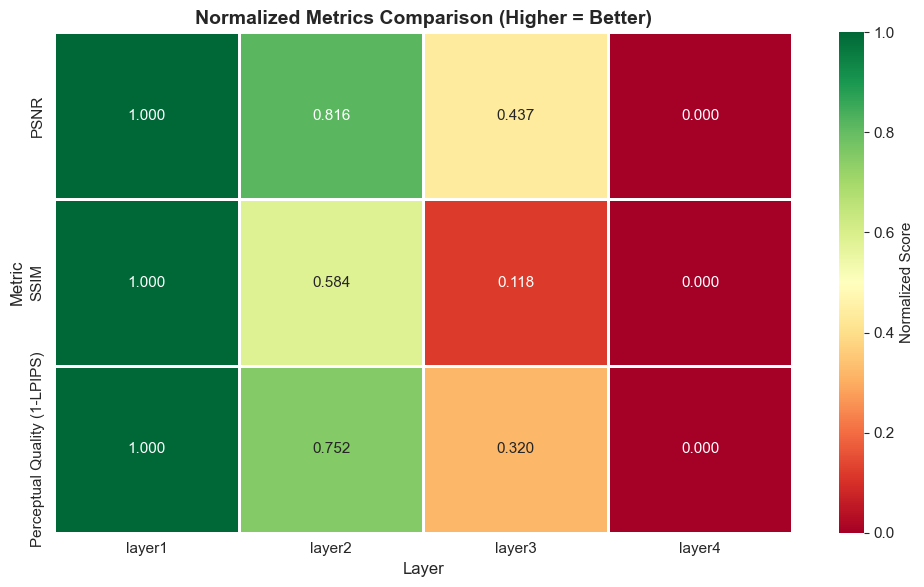


Heatmap shows Layer1 dominates across all metrics!


In [21]:
# Plot 4 - Comprehensive Metrics Heatmap
# Normalize metrics for heatmap (higher = better for all)
heatmap_data = df[['psnr_mean', 'ssim_mean']].copy()
heatmap_data['lpips_inverted'] = 1 - df['lpips_mean']  # Invert LPIPS (lower is better)
heatmap_data.index = df['layer']

# Normalize to 0-1 scale
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
heatmap_normalized = pd.DataFrame(
    scaler.fit_transform(heatmap_data),
    columns=['PSNR', 'SSIM', 'Perceptual Quality (1-LPIPS)'],
    index=heatmap_data.index
)

fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(heatmap_normalized.T, annot=True, fmt='.3f', 
            cmap='RdYlGn', cbar_kws={'label': 'Normalized Score'},
            linewidths=2, linecolor='white', ax=ax)
ax.set_title('Normalized Metrics Comparison (Higher = Better)', 
             fontsize=14, fontweight='bold')
ax.set_xlabel('Layer', fontsize=12)
ax.set_ylabel('Metric', fontsize=12)
plt.tight_layout()
plt.show()

print("\nHeatmap shows Layer1 dominates across all metrics!")



In [16]:
# Summary Statistics
print("\n" + "="*60)
print("SUMMARY STATISTICS")
print("="*60)

best_psnr = df.loc[df['psnr_mean'].idxmax()]
best_ssim = df.loc[df['ssim_mean'].idxmax()]
best_lpips = df.loc[df['lpips_mean'].idxmin()]  # Lower is better
fastest = df.loc[df['training_time_minutes'].idxmin()]

print(f"\nBest PSNR: {best_psnr.name} ({best_psnr['psnr_mean']:.2f} dB)")
print(f"Best SSIM: {best_ssim.name} ({best_ssim['ssim_mean']:.4f})")
print(f"Best LPIPS: {best_lpips.name} ({best_lpips['lpips_mean']:.4f})")
print(f"Fastest Training: {fastest.name} ({fastest['training_time_minutes']:.1f} min)")

print(f"\nPerformance Degradation (Layer1 → Layer4):")
print(f"  PSNR: {df.iloc[0]['psnr_mean']:.2f} → {df.iloc[-1]['psnr_mean']:.2f} dB (-{((df.iloc[0]['psnr_mean'] - df.iloc[-1]['psnr_mean']) / df.iloc[0]['psnr_mean'] * 100):.1f}%)")
print(f"  SSIM: {df.iloc[0]['ssim_mean']:.4f} → {df.iloc[-1]['ssim_mean']:.4f} (-{((df.iloc[0]['ssim_mean'] - df.iloc[-1]['ssim_mean']) / df.iloc[0]['ssim_mean'] * 100):.1f}%)")
print(f"  LPIPS: {df.iloc[0]['lpips_mean']:.4f} → {df.iloc[-1]['lpips_mean']:.4f} (+{((df.iloc[-1]['lpips_mean'] - df.iloc[0]['lpips_mean']) / df.iloc[0]['lpips_mean'] * 100):.1f}%)")

print("\n" + "="*60)


SUMMARY STATISTICS

Best PSNR: resnet34_layer1_attention (14.29 dB)
Best SSIM: resnet34_layer1_attention (0.4680)
Best LPIPS: resnet34_layer1_attention (0.4517)
Fastest Training: resnet34_layer2_attention (35.8 min)

Performance Degradation (Layer1 → Layer4):
  PSNR: 14.29 → 13.03 dB (-8.8%)
  SSIM: 0.4680 → 0.2712 (-42.1%)
  LPIPS: 0.4517 → 0.8701 (+92.6%)

